In [155]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import sys
sys.path.append("C:\\Users\\Owen\\Documents\\git_projects\\CS534-Project-Team-2")
from src.data_pre_processing import load_data

In [156]:
model = tf.keras.models.load_model("C:\\Users\\Owen\\Documents\\git_projects\\CS534-Project-Team-2\\data\\dnet.keras")

In [157]:
data, labels = load_data()
formatted_labels = 1 - np.minimum(labels, 1)

In [158]:
predictions = model(data).numpy()

In [159]:
random_data = np.random.random((200, *data.shape[1:]))/100
random_predictions = model(random_data).numpy()

In [160]:
print("Random predictions", pd.DataFrame(random_predictions).describe())
print()
print("Whole Dataset predictions", pd.DataFrame(predictions).describe())
print()
print("Good Boid predictions", pd.DataFrame(predictions[formatted_labels[:, 0] == 1]).describe())
print()
print("Bad Boid predictions", pd.DataFrame(predictions[formatted_labels[:, 0] == 0]).describe())

Random predictions                 0
count  200.000000
mean     0.517391
std      0.036737
min      0.335295
25%      0.506550
50%      0.531641
75%      0.543447
max      0.552730

Whole Dataset predictions                    0
count  342360.000000
mean        0.664253
std         0.158543
min         0.000037
25%         0.573272
50%         0.693589
75%         0.783288
max         0.982491

Good Boid predictions                    0
count  285300.000000
mean        0.665781
std         0.154439
min         0.000318
25%         0.574887
50%         0.693680
75%         0.782513
max         0.982491

Bad Boid predictions                   0
count  57060.000000
mean       0.656612
std        0.177453
min        0.000037
25%        0.564156
50%        0.693025
75%        0.787434
max        0.980049


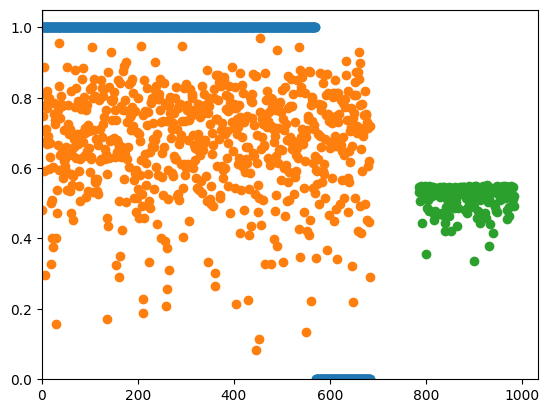

In [161]:
labels_pruned = formatted_labels[::500]
predictions_pruned = predictions[::500]
plt.scatter(range(len(labels_pruned)), labels_pruned)
plt.scatter(range(len(labels_pruned)), predictions_pruned)
plt.scatter(range(len(labels_pruned) + 100, len(labels_pruned) + random_predictions.shape[0] + 100), random_predictions)
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [162]:
loss = np.mean(np.square(predictions - formatted_labels))
loss

0.19006598